## AirBnB Exploratory Data Analysis

Airbnb is a global online marketplace that connects travelers with unique lodging options, from apartments and houses to treehouses and castles.It offers a diverse range of accommodations in various destinations, empowering both travelers and hosts to experience authentic and personalized travel experiences.

Importance of Analyzing AirBnB Booking data
- Analyze market trends
- Identify profitable locations
- Optimize pricing strategies
- Enhance customer experience


### Data Preprocessing 

Data preprocessing is the process of transforming raw data into a suitable format for analysis or machine learning. It involves various techniques to clean, transform, and prepare the data, ensuring its quality and suitability for the intended use.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df=pd.read_csv(r'C:\Users\dell\Desktop\AirBnB\dataset\Airbnb_Open_Data.csv')
df.head(2)

C:\Users\dell\AppData\Local\Temp\ipykernel_12936\4274659723.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'C:\Users\dell\Desktop\AirBnB\dataset\Airbnb_Open_Data.csv')


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN


In [3]:
# Check the shape of the dataset
df.shape

(102599, 26)

In [4]:
# Check the columns of the dataset
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [5]:
# Check the data types of the columns
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

In [6]:
# Correct the data types of the columns
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)
df['service fee']=df['service fee'].replace(r'[\$,]','',regex=True).astype(float)

In [7]:
# Check the missing values in the dataset
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [8]:
# Handle the missing values in the dataset

# Drop the records with missing NAME and host name
df.dropna(subset=['NAME','host name'],inplace=True)

# Fill missing values
#df.fillna({'reviews per month':0,'last review':df['last review'].min(),'minimum nights':df['minimum nights'].mean(),'price':df['price'].mean(),'service fee':df['service fee'].mean()},inplace=True)

# Convert last review to datetime
df['last review']=pd.to_datetime(df['last review'],errors='coerce')

# Delete the license column
df.drop('license',axis=1,inplace=True)

In [9]:
# Check for duplicates and drop them
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [10]:
# Confirm the data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101410 entries, 0 to 102057
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101410 non-null  int64         
 1   NAME                            101410 non-null  object        
 2   host id                         101410 non-null  int64         
 3   host_identity_verified          101134 non-null  object        
 4   host name                       101410 non-null  object        
 5   neighbourhood group             101384 non-null  object        
 6   neighbourhood                   101394 non-null  object        
 7   lat                             101402 non-null  float64       
 8   long                            101402 non-null  float64       
 9   country                         100884 non-null  object        
 10  country code                    101288 non-null  object      

In [11]:
# Statistical summary of the dataset
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.014100e+05,1.014100e+05,101402.000000,101402.000000,101210.000000,101171.000000,101142.000000,101016.000000,101228.000000,85693,85707.000000,101103.000000,101092.000000,100990.000000
mean,2.920959e+07,4.926155e+10,40.728082,-73.949663,2012.486908,625.381008,125.043998,8.113744,27.511854,2019-06-11 10:55:18.740154112,1.376326,3.278558,7.948463,141.164660
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.507574e+07,2.459183e+10,40.688730,-73.982570,2007.000000,340.000000,68.000000,2.000000,1.000000,2018-10-28 00:00:00,0.220000,2.000000,1.000000,3.000000
50%,2.922911e+07,4.912069e+10,40.722300,-73.954440,2012.000000,625.000000,125.000000,3.000000,7.000000,2019-06-14 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,4.328308e+07,7.399747e+10,40.762750,-73.932340,2017.000000,913.000000,183.000000,5.000000,31.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.626820e+07,2.853703e+10,0.055850,0.049474,5.765130,331.609111,66.313374,30.378014,49.549258,NaN,1.749557,1.285369,32.328974,135.419199


### Visualizations

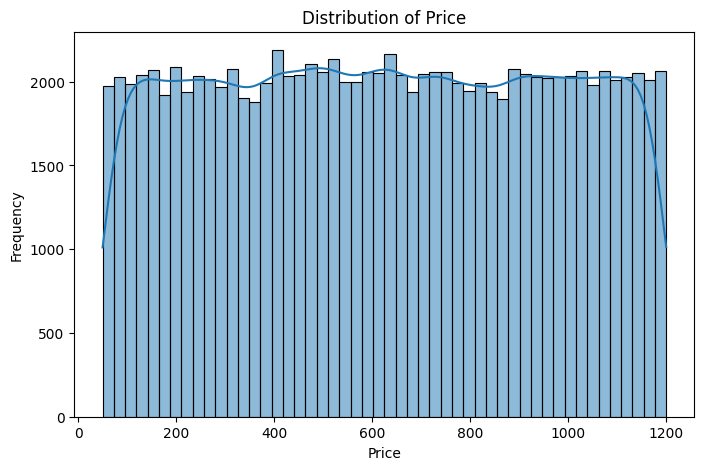

In [12]:
# Distribution of the price
plt.figure(figsize=(8,5))
sns.histplot(df['price'],bins=50,kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The histogram shows a fairly even distribution of listing prices across different price ranges, indicating no particular concentration of listings in any specific price range.This suggests that the market is relatively balanced, with a wide range of properties available at various price points

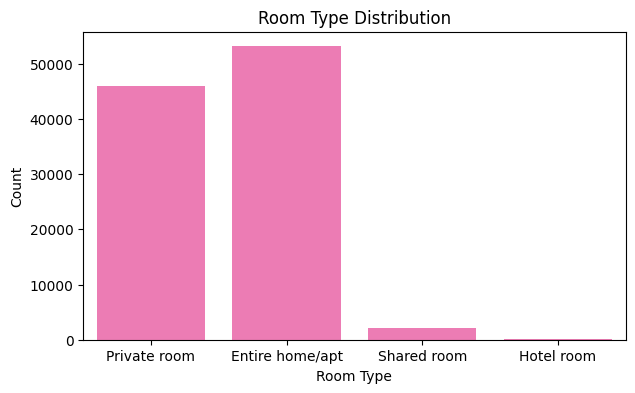

In [13]:
# Room type distribution
plt.figure(figsize=(7,4))
sns.countplot(x='room type',data=df,color='hotpink')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

The count plot shows a clear distribution of the different room types available in the Airbnb dataset. The majority of listings are for 'Entire home/apt' and 'Private room', with 'Shared room' and 'Hotel room' being much less common. This insight can be useful for understanding the availability and popularity of different types of accommodations on Airbnb.


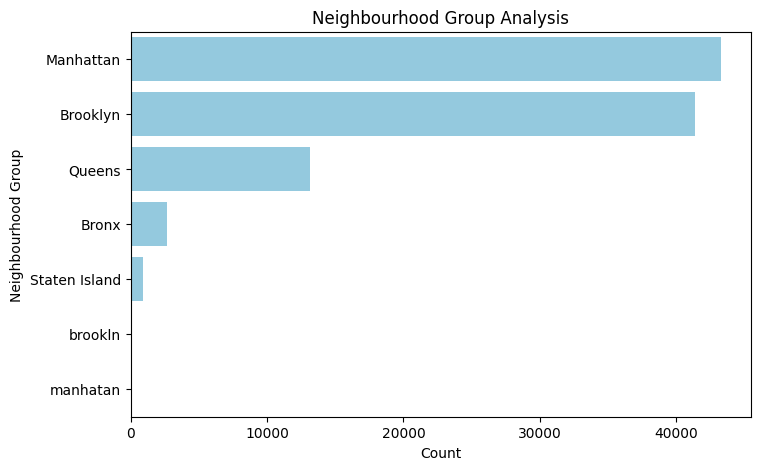

In [14]:
# Neighbourhood Group Analysis
plt.figure(figsize=(8,5))
sns.countplot(y='neighbourhood group',data=df,order=df['neighbourhood group'].value_counts().index,color='skyblue')
plt.title('Neighbourhood Group Analysis')
plt.xlabel('Count')
plt.ylabel('Neighbourhood Group')
plt.show()

The count plot shows a distribution of the number of listings across different neighborhood groups. Manhattan and Brooklyn dominate the listings, suggesting they are prime locations for Airbnb. Queens, Bronx, and Staten Island have fewer listings, indicating less availability or popularity.

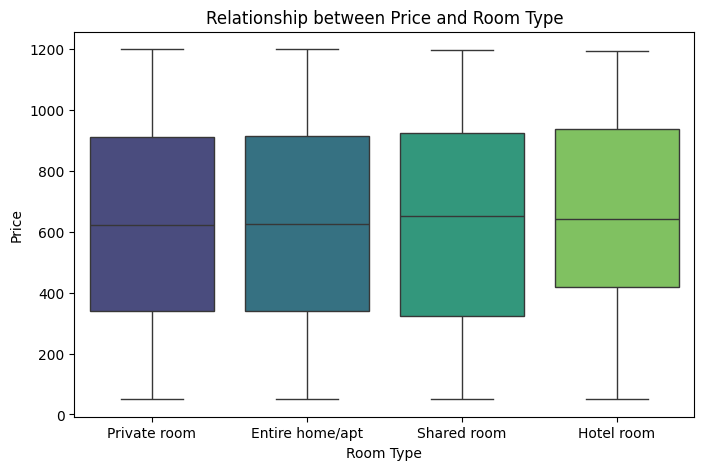

In [15]:
# Relationship between price and room type
plt.figure(figsize=(8,5))
sns.boxplot(x='room type',y='price',data=df,hue='room type',palette='viridis')
plt.title('Relationship between Price and Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

The box plot provides a detailed view of how prices vary across different room types in the Airbnb dataset. It shows that while 'Shared room' tends to have lower prices, 'Private room', 'Entire home/apt', and 'Hotel room' have higher and more varied price ranges.

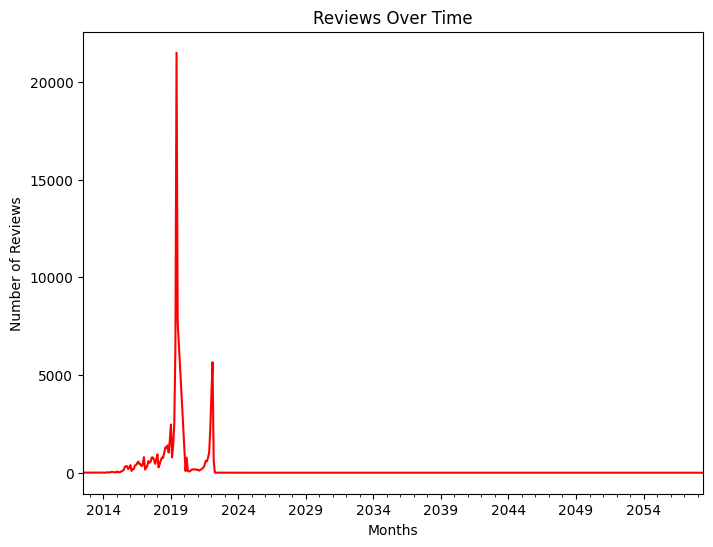

In [9]:
# Reviews Over Time
df['last review'] = pd.to_datetime(df['last review'])
reviews_over_time = df.groupby(df['last review'].dt.to_period('M')).size()

plt.figure(figsize=(8,6))
reviews_over_time.plot(kind='line',color='Red')
plt.title('Reviews Over Time')
plt.xlabel('Months')
plt.ylabel('Number of Reviews')
plt.show()

The line plot provides a insight on the number of reviews over time. It helps identify trends and patterns in review activity, such as periods of high or low activity.

Text(0.5, 1.0, 'Distribution of Host Identity Verified')

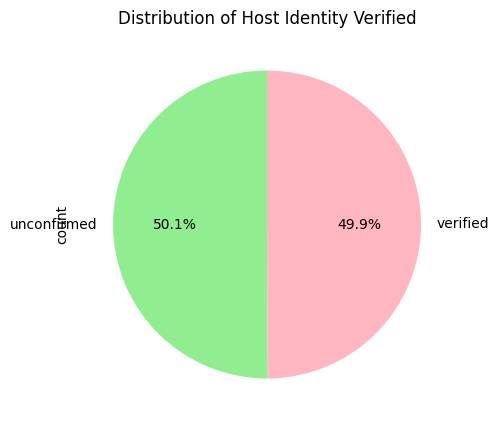

In [18]:
# Distribution of host identity verified
identity_verified = df['host_identity_verified'].value_counts()

plt.figure(figsize=(8,5))
identity_verified.plot(kind='pie',labels=identity_verified.index,colors=['lightgreen','lightpink'],autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Host Identity Verified')

The pie chart illustrates that approximately 50% of hosts on Airbnb are verified, while the remaining 50% are not.

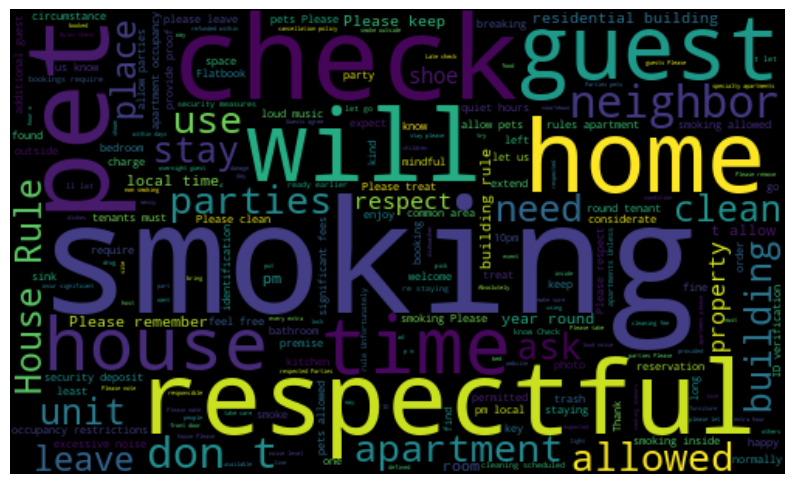

In [19]:
# Word Cloud of house rules
! pip install wordcloud -q
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['house_rules'].dropna().astype(str).tolist())
plt.figure(figsize=(10,10))
wordcloud = WordCloud(width = 500, height = 300).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


This word cloud offers insights into the most frequently used terms within house rules, including 'guest,' 'home,' 'pet,' and 'respectful.

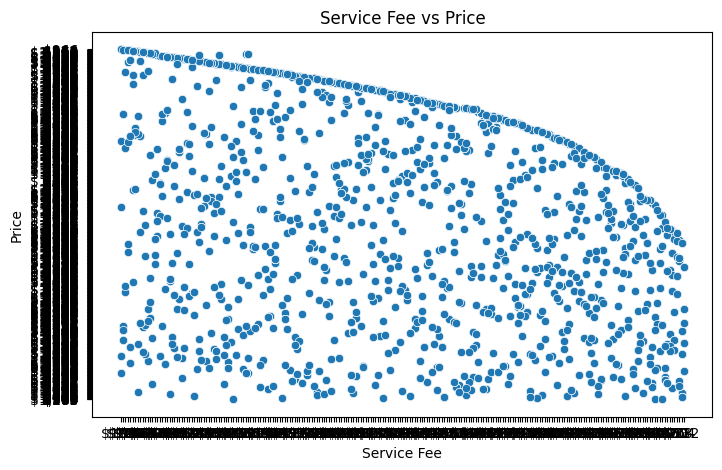

In [8]:
# Service Fee vs price
plt.figure(figsize=(8,5))
sns.scatterplot(x='service fee',y='price',data=df)
plt.title('Service Fee vs Price')
plt.xlabel('Service Fee')
plt.ylabel('Price')
plt.show()

The scatter plot demonstrates a significant relationship between price and service fee. 

## Key Insights
1. Pricing Distribution:
- Most Airbnb listings are priced within a moderate range.
- There are a few high-priced outliers, indicating some premium listings with significantly higher prices.

2. Room Type Distribution:
-  The majority of listings are either entire homes/apartments or private rooms.
-  Shared rooms and hotel rooms constitute a very small portion of the listings.

3. Geographical Distribution:
-  Listings are predominantly concentrated in popular areas like Brooklyn and Manhattan.
-  Other boroughs such as Queens, Bronx, and Staten Island have fewer listings.

4. Price Comparison by Room Type:
- Entire homes/apartments generally cost more than private rooms.
-  Shared rooms tend to have the lowest prices among the room types.

5. Seasonal Trends in Reviews:
-  There are observable seasonal trends in the number of reviews.
-  Certain months experience higher review activity,
